In [122]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt 

def F(A, x, b):
    Ax = A @ x
    diff = Ax - b
    result = diff.T @ diff
    return result

import numpy as np

def gradiente_F(A, b, x):
    Ax_menos_b = A @ x - b
    gradiente = 2 * A.T @ Ax_menos_b
    return gradiente

def F2(A, x, b, delta):
    Fx = F(A, x, b)
    norm_x_squared = np.linalg.norm(x) ** 2
    result = Fx + delta * norm_x_squared
    return result

def gradiente_F2(A, b, x, delta=1):
    grad_F = gradiente_F(A, b, x)
    grad_F2 = grad_F + 2 * delta * x
    return grad_F2

def maximo_valor_principal (A):
    _, S, _ = np.linalg.svd(A, full_matrices=False)
    print (np.diag(S))
    return np.max(S)

In [123]:
def random_matrix(n, d):
    """
    generate a random matrix of size n x d where n is the number of samples and d is the number of features
    aij in [-1, 1]
    """
    return np.random.uniform(-1, 1, (n, d))

def random_vector(n):
    """
    generate a random vector of size n
    v_i in [-1, 1]
    """
    return np.random.uniform(-1, 1, n)

def generate_matrix_with_eigenval_magnitude(n, d, magnitud):
    """
    generate a random matrix of size n x d where n is the number of samples and d is the number of features
    """
    A = np.random.rand(n, d)
    H = 2* np.dot(A.T, A)
    u_H, s_H, vt_H = np.linalg.svd(H)
    s_H_magnitud = magnitud * s_H
    H_escala = u_H @ np.diag(s_H_magnitud) @ vt_H
    A_escala = la.cholesky(H_escala)
    return A_escala

def gradient_decent(A, b, x0, delta, tol, max_iter, gradient):
    x = x0
    xs = [x]
    for i in range(max_iter):
        gradiente = gradient(A, b, x)
        if np.linalg.norm(gradiente) < tol:
            break
        x = x - delta * gradiente
        xs.append(x)
    return xs


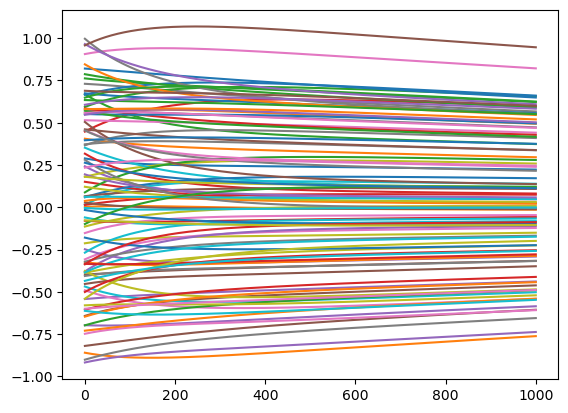

In [149]:
rnd_A = random_matrix(5, 100)
rnd_b = random_vector(5)
rnd_x0 = random_vector(100)

# gráfico de los valores que toma x cuando se hace el descenso de gradiente
xs = gradient_decent(rnd_A, rnd_b, rnd_x0, 0.0001, 0.0001, 1000, gradiente_F2)
xs = np.array(xs)
plt.plot(xs)
plt.show()


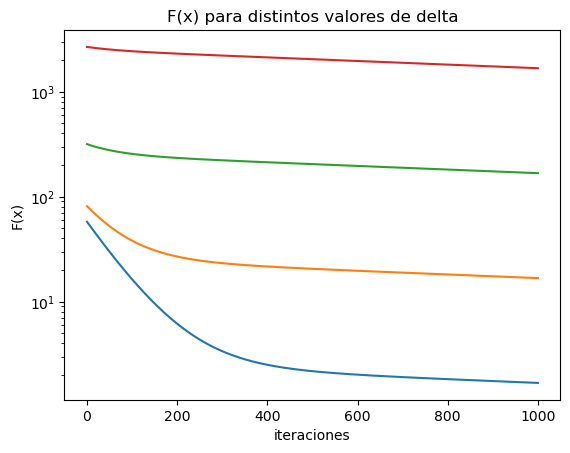

In [156]:
# gráfico de los valores de F para cada uno de los x encontrados con el descenso de gradiente
deltas = [0.1, 1, 10, 100]
ys0 = [F2(rnd_A, x, rnd_b, 0.1) for x in xs]
ys1 = [F2(rnd_A, x, rnd_b, 1) for x in xs]
ys2 = [F2(rnd_A, x, rnd_b, 10) for x in xs]
ys3 = [F2(rnd_A, x, rnd_b, 100) for x in xs]
plt.plot(ys0)
plt.plot(ys1)
plt.plot(ys2)
plt.plot(ys3)
plt.yscale('log')
plt.ylabel('F(x)')
plt.xlabel('iteraciones')
plt.title('F(x) para distintos valores de delta')
plt.show()